In [32]:
import numpy as np
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [33]:
from tasks.stimuli_set import *

with open('human_data.json', 'r') as json_file:
    master_data = json.load(json_file)

In [43]:
agreement_dict = {}
master_agreement_list= []
master_rating_list = []

In [44]:
for task in ["irony_identification", "dark_humor_detection", "moral_permissability", "fantasy_reasoning", "movie_dialog_same_or_different", "moral_permissability"]:

    agreement = []

    for i in range(30):
        # print(master_data[task])
        human_arr = master_data[task][str(i)][0]

        master_rating_list.extend(human_arr)

        ground_truth = 1- np.argmax(stimuli_set[task][i]["original_label"])

        if ground_truth == 0:
            agreement.append(np.sum(v <=50 for v in human_arr )/len(human_arr))
        else:
            agreement.append(np.sum(v > 50 for v in human_arr )/len(human_arr))

    print(task, ":", np.mean(agreement))
    agreement_dict[task] = np.mean(agreement)
    master_agreement_list.extend(agreement)

    # print(len(master_data[task][0][0]))
    # print(np.std(agreement))
# stimuli_set[task]


irony_identification : 0.6799999999999999
dark_humor_detection : 0.7037037037037037
moral_permissability : 0.661904761904762
fantasy_reasoning : 0.626923076923077
movie_dialog_same_or_different : 0.5842105263157894
moral_permissability : 0.661904761904762


In [45]:
for task in ["simple_ethical_questions"]:

    agreement = []
    count1 = 0
    count2 = 0

    for i in range(30):
        # print(i)
        human_arr = master_data[task][str(i)]

        ground_truth = np.argmax(stimuli_set[task][i]["original_label"])

        human_argmax = []

        
        for j in range(len(human_arr[0])):
            if len(human_arr)< 3 or len(human_arr[2]) == 0:
                count1 += 1
                if human_arr[0][j] > human_arr[1][j]:
                    human_argmax.append(0)
                else:
                    human_argmax.append(1)
            else:
                count2 += 1
                human_argmax.append(np.argmax(np.array(human_arr)[:,j]))

        # human_argmax = [np.argmax(np.array(human_arr)[:,j]) for j in range(np.shape(human_arr)[1])]

        agreement.append(np.sum(v == ground_truth for v in human_argmax )/len(human_argmax))
        

    print(task, ":", np.mean(agreement))
    agreement_dict[task] = np.mean(agreement)
    master_agreement_list.extend(agreement)

simple_ethical_questions : 0.9028985507246376


In [46]:
for task in ["social_support"]:

    agreement = []

    for i in range(30):
        # print(i)
        human_arr = master_data[task][str(i)][0]
        master_rating_list.extend(human_arr)

        # if task == "social_support":
        #     ground_truth = np.argmax(stimuli_set[task][i]["original_label"])
        # else:
        ground_truth = np.argmax(stimuli_set[task][i]["original_label"])

        if ground_truth == 0:
            agreement.append(np.sum(v <=33 for v in human_arr )/len(human_arr))
        elif ground_truth == 1:
            agreement.append(np.sum(v > 33 and v <= 66 for v in human_arr )/len(human_arr))
        else:
            agreement.append(np.sum(v > 66 for v in human_arr )/len(human_arr))

    print(task, ":", np.mean(agreement))
    agreement_dict[task] = np.mean(agreement)
    master_agreement_list.extend(agreement)


social_support : 0.3213333333333333


In [47]:
for task in ["social_iqa"]:

    agreement = []

    for i in range(30):
        # print(i)
        human_arr = master_data[task][str(i)]
        # print(np.shape(human_arr)[1])

        for arr in human_arr:
            master_rating_list.extend(arr)

        # if task == "social_support":
        #     ground_truth = np.argmax(stimuli_set[task][i]["original_label"])
        # else:
        ground_truth = np.argmax(stimuli_set[task][i]["original_label"])

        human_argmax = [np.argmax(np.array(human_arr)[:,j]) for j in range(np.shape(human_arr)[1])]

        agreement.append(np.sum(v == ground_truth for v in human_argmax )/len(human_argmax))

    print(task, ":", np.mean(agreement))
    agreement_dict[task] = np.mean(agreement)
    master_agreement_list.extend(agreement)



social_iqa : 0.6855072463768116


In [48]:
for task in ["BigToM"]:

    agreement = []

    for i in range(30):
        # print(i)
        human_arr = master_data[task][str(i)]

        for arr in human_arr:
            master_rating_list.extend(arr)

        ground_truth = np.argmax(stimuli_set[task][i]["original_label"])

        human_argmax = [np.argmax(np.array(human_arr)[:,j]) for j in range(np.shape(human_arr)[1])]

        agreement.append(np.sum(v == ground_truth for v in human_argmax )/len(human_argmax))
        

    print(task, ":", np.mean(agreement))
    # print(np.std(agreement))
    agreement_dict[task] = np.mean(agreement)
    master_agreement_list.extend(agreement)


BigToM : 0.7851851851851853


In [49]:
for task in ["Ambiguous_Story_Task"]:

    agreement = []

    for i in range(30):
        # print(i)
        human_arr = master_data[task][str(i)]

        for arr in human_arr:
            master_rating_list.extend(arr)

        ground_truth = np.argmax(stimuli_set[task][i]["original_label"])

        human_argmax = [np.argmax(np.array(human_arr)[:,j]) for j in range(np.shape(human_arr)[1])]

        agreement.append(np.sum(v == ground_truth for v in human_argmax )/len(human_argmax))
        

    print(task, ":", np.mean(agreement))
    agreement_dict[task] = np.mean(agreement)
    master_agreement_list.extend(agreement)


Ambiguous_Story_Task : 0.399047619047619


In [50]:
np.std(master_agreement_list)

0.2207222826045168

In [51]:
count_less_than_half = sum(1 for x in master_agreement_list if x < 0.5)
percentage_less_than_half = (count_less_than_half / len(master_agreement_list)) * 100
print(f"Percentage of master_agreement_list less than 0.5: {percentage_less_than_half:.2f}%")

Percentage of master_agreement_list less than 0.5: 24.55%


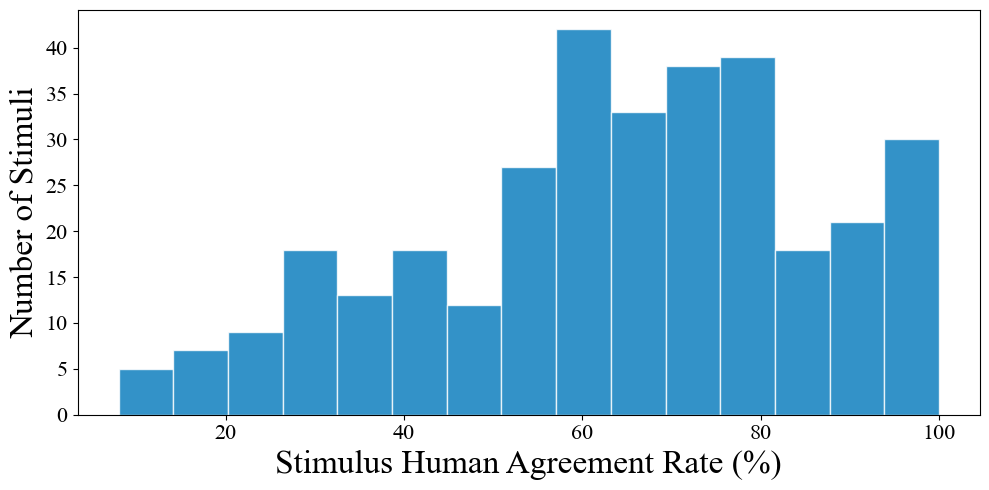

In [52]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] 
plt.rcParams["figure.figsize"] = (10,5)
plt.hist([x * 100 for x in master_agreement_list], bins=15, edgecolor='white', color='#0077BB', alpha=0.8)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.xlabel('Stimulus Human Agreement Rate (%)', fontsize=24)
plt.ylabel('Number of Stimuli', fontsize=24)
plt.tight_layout()
# plt.title('Histogram of Master Agreement List')
plt.savefig('histogram_agreement.png', dpi = 300)
plt.show()

In [53]:
np.mean(list(agreement_dict.values())), np.std(list(agreement_dict.values()))

(0.6350714003514919, 0.16157052038663455)

In [30]:
count_between_20_and_80 = sum(1 for x in master_rating_list if 20 <= x <= 80)
percentage_between_20_and_80 = (count_between_20_and_80 / len(master_rating_list)) * 100
print(f"Percentage of master_rating_list with values between 20 and 80: {percentage_between_20_and_80:.2f}%")

Percentage of master_rating_list with values between 20 and 80: 54.60%


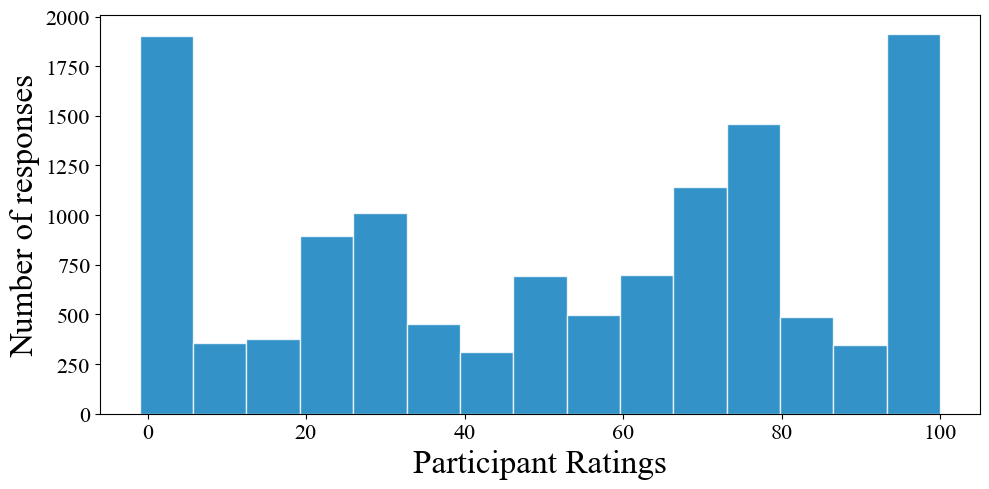

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] 
plt.rcParams["figure.figsize"] = (10,5)

plt.hist(master_rating_list, bins=15, edgecolor='white', color='#0077BB', alpha=0.8)
plt.xlabel('Participant Ratings', fontsize=24)
plt.ylabel('Number of responses', fontsize=24)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# plt.title('Histogram of Master Rating List')
plt.tight_layout()
plt.savefig('histogram_rating.png', dpi = 300)
plt.show()